<a href="https://colab.research.google.com/github/KathyReid/tutorial-whisper-fine-tuning-australian-EO2026/blob/main/EO2026_teach_whisper_to_speak_Australian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EO2026 Tutorial:
## Teach Whisper to speak Australian by fine-tuning using data from the Mozilla Data Collective

In [ ]:
## Prerequisites


In [ ]:
## TODO - something here about uploading the dataset

In [ ]:
## Something here about a summary of key steps

## Download the `en-AU` Common Voice dataset from the Mozilla Data Collective


**TBA** Once I have established that the dataset is in the correct format

## Clone the GitHub repo

In this tutorial, we will be using the repo:

[https://github.com/Mozilla-Data-Collective/tutorial-whisper-fine-tuning-australian-EO2026](https://github.com/Mozilla-Data-Collective/tutorial-whisper-fine-tuning-australian-EO2026)

This is based on [the Speech to Text Finetune Blueprint](https://github.com/mozilla-ai/speech-to-text-finetune) by [Kostis Saitis Zarkias](https://www.linkedin.com/in/kostissz/) at Mozilla.AI, and I thank him for his excellent work. Thanks, Kostis!



In [1]:
!git clone https://github.com/Mozilla-Data-Collective/tutorial-whisper-fine-tuning-australian-EO2026

Cloning into 'tutorial-whisper-fine-tuning-australian-EO2026'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 161 (delta 49), reused 123 (delta 24), pack-reused 0 (from 0)
Receiving objects: 100% (161/161), 2.56 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (49/49), done.


## Install Python dependencies

In [2]:
# change into the repo we've just cloned
# user-created content on Google Colab lives at /content
%cd /content/tutorial-whisper-fine-tuning-australian-EO2026

/content/tutorial-whisper-fine-tuning-australian-EO2026


In [3]:
# install Python dependencies
# this may take a few minutes because there are _lots_ of Python dependencies
!pip install -e .

Obtaining file:///content/tutorial-whisper-fine-tuning-australian-EO2026
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.2/105.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 97.9 MB/s eta 0:00:00
  Building editable for speech-to-text-finetune (pyproject.toml) ... done
  Created wheel for speech-to-text-finetune: filename=speech_to_text_finetune-0.1.dev27+g9e305298f-0.editable-py3-none-any.whl size=6716 sha256=9ac3327cbb039fd0db7bc197379035d73596ce379dc74fa26009f963653318e5
  Stored in directory: /tmp/pip-ephem-wheel-c

## Run the transcribe demo to see how well Whisper models _currently_ transcribe your speech.

* Run the cell below and open the `*.gradio.live` link.
* Under "Option 1" select one of the Whisper speech recognition models. There is a trade-off between size and accuracy - the `small` model is smaller and transcribes faster, but is less accurate.
* Record a sentence or two using the "Record" button. Be sure to add some bonza ridgy-didge Australian lingo into your sentence. All jokes aside, Whisper tends to trip up on a lot of Australian place names or street names that are Indigenous-language derived, so try a few of these.
* Make a note of what phrases or words Whisper mis-transcribed. Do you notice any patterns in which phrases were mis-transcribed?


When you have finished this task, click the square "stop" button on the cell to stop the Gradio application, or close the window it opened in.

_NOTE: If you get an "Error" after hitting "Transcribe" in the Gradio window, simply hit "Transcribe" again, it can be a little flakey._

In [ ]:
%cd /content/tutorial-whisper-fine-tuning-australian-EO2026/demo
!python transcribe_app.py

/content/tutorial-whisper-fine-tuning-australian-EO2026/demo
2026-01-18 03:47:34.677769: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768708054.697561    5123 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768708054.703630    5123 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768708054.718651    5123 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768708054.718679    5123 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768708054.718

### Setup GPU
First, you'll need to enable GPUs for the notebook: Navigate to Edit→Notebook Settings Select T4 GPU from the Hardware Accelerator section Click Save and accept. Next, we'll confirm that we can connect to the GPU:

In [1]:
import torch

if not torch.cuda.is_available():
    print("GPU NOT available!")
else:
    print("GPU is available!")

GPU is available!


## Setup a HuggingFace personal access token and login to Hugging Face


In order to track training and evaluation metrics of the fine tuning and save your final model to use it and share it with others later, we will be using the Hugging Face (HF) platform.

#### Make sure you have a HuggingFace account

* [Create an account here if you don't have one](https://huggingface.co/join)

#### Set up a Personal Access Token

* [Set up a personal access token](huggingface.co/settings/tokens)

Following the principle of least privilege, it is recommended that a _fine-grained_ token is created, rather than a blanket Read or Write token.

These are the permissions required for the personal access token:

* User permissions -> Repositories -> "Read access to contents of all repos under your personal namespace"
* User permissions -> Repositories -> "Write access to contents/settings of all repos under your personal namespace"
* User permissions -> Inference -> "Make calls to Inference Providers"


#### Add your HF personal access token as a secret to this Colab notebook

In the left hand menu, choose the "key" icon and add your Personal Access Token in the "Value" column and give it the name `HF_TOKEN`. Be sure to give it notebook access.







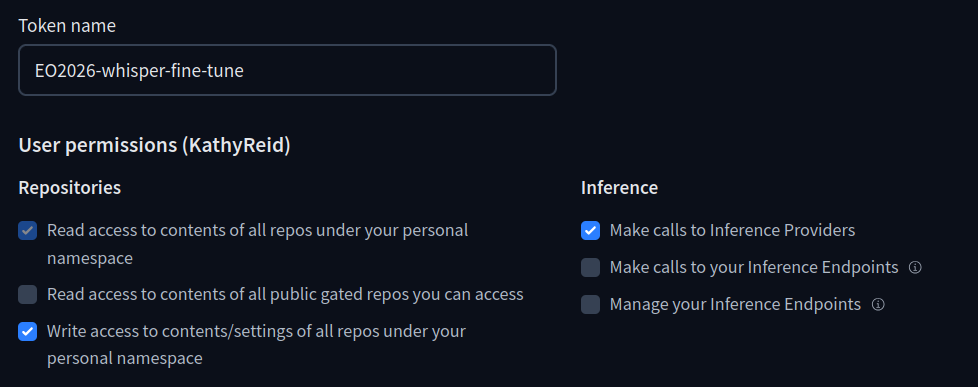

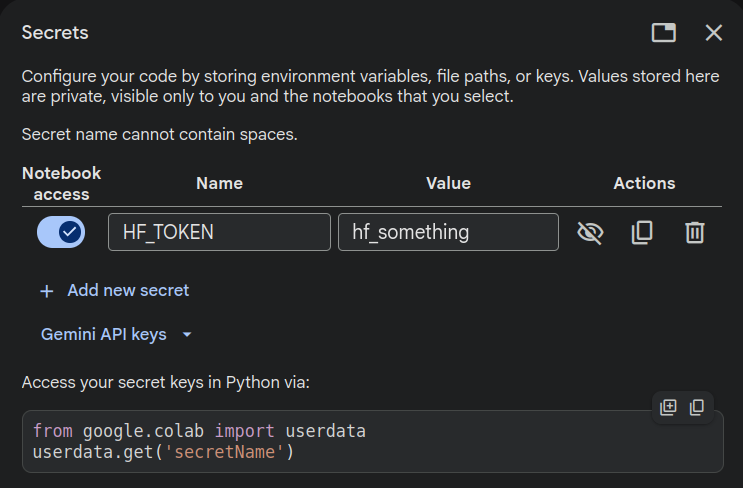

In [2]:
# use your `HF_TOKEN` to authenticate to HuggingFace
from huggingface_hub import login
from google.colab import userdata

myToken = userdata.get('HF_TOKEN')
login(token=myToken)

In [3]:
# check that we have successfully authenticated with HuggingFace
# if so, your HuggingFace username will be shown here
from huggingface_hub import HfApi
api = HfApi()
print(api.whoami()['name'])

# if you see your HF username below,
# you have successfully authenticated

KathyReid


### Download and install speech-to-text-finetune package

In [5]:
!git clone https://github.com/mozilla-ai/speech-to-text-finetune.git

Cloning into 'speech-to-text-finetune'...
remote: Enumerating objects: 1177, done.
remote: Counting objects: 100% (443/443), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 1177 (delta 349), reused 231 (delta 231), pack-reused 734 (from 2)
Receiving objects: 100% (1177/1177), 5.83 MiB | 12.47 MiB/s, done.
Resolving deltas: 100% (573/573), done.


In [6]:
%cd speech-to-text-finetune/

/content/speech-to-text-finetune/speech-to-text-finetune


In [7]:
!pip install --quiet -e .

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.4 MB/s eta 0:00:00
  Building editable for speech-to-text-finetune (pyproject.toml) ... done


***IMPORTANT:*** After installing the package, you need to restart the kernel / session: "Runtime -> Restart session" and then run the cells below.

If you see the error

```
[Errno 2] No such file or directory: 'speech-to-text-finetune/'
/content/tutorial-whisper-fine-tuning-australian-EO2026/speech-to-text-finetune
```

then you haven't restarted the kernel / session :-)

In [1]:
# after restarting the session, you will need to change directory
%cd speech-to-text-finetune/

/content/speech-to-text-finetune


In [2]:
# this step might take 20-30 seconds to run, that's OK
from speech_to_text_finetune.finetune_whisper import run_finetuning

## Making your own STT model using Custom Data

    Create your own, local, custom dataset by running this command and following the instructions: python src/speech_to_text_finetune/make_custom_dataset_app.py
    Configure config.yaml with the model, custom data directory and hyperparameters of your choice. Note that if you select push_to_hub: True you need to have an HF account and log in locally.
    Finetune a model by running: python src/speech_to_text_finetune/finetune_whisper.py
    Test the finetuned model in the transcription app: python demo/transcribe_app.py


In [ ]:
!python src/speech_to_text_finetune/finetune_whisper.py

2026-01-21 03:10:19.148922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768965019.170698    3406 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768965019.177266    3406 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768965019.193784    3406 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768965019.193822    3406 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768965019.193826    3406 computation_placer.cc:177] computation placer alr

In [ ]:
!ls /home/user

ls: cannot access '/home/user': No such file or directory


In [ ]:
!pwd

/content/speech-to-text-finetune


In [6]:
!rm -rf /content/commonvoice-v24_en-AU/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Download the `en-AU` dataset from Mozilla Data Collective, and upload it to Google Colab

* Log in the the [Mozilla Data Collective](https://datacollective.mozillafoundation.org/) platform
* Download the [Common Voice v24 English `en-AU` subset](https://datacollective.mozillafoundation.org/datasets/cmko7havo02f5nw07rbwwhowe)
* !IMPORTANT! Rename the file to `commonvoice-v24_en-AU.tar.gz` (it may be named differently when you download it from MDC).
* Use the "Files" view at the left (folder icon) and the "Upload" functionality to upload the `commonvoice-v24_en-AU.tar.gz.tar.gz` file to "Files" in Google Colab.

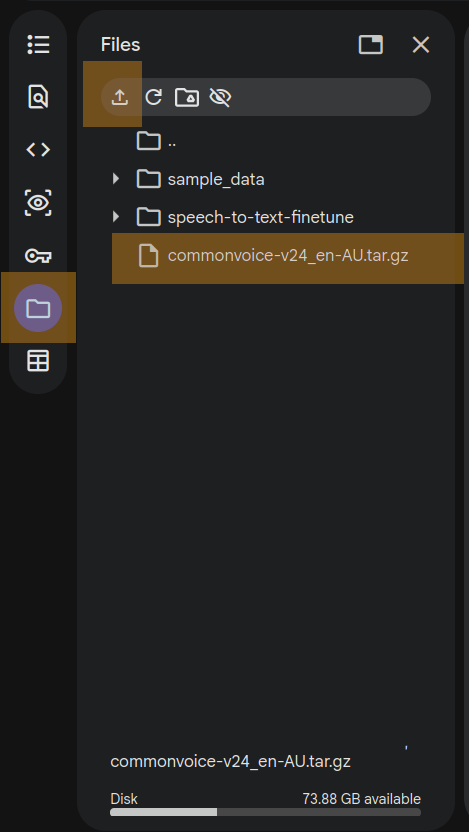

In [7]:
# ensure that the tar.gz file has been uploaded correctly
# it can take 10-15 minutes or so to upload
# depending on your internet speed
# because it's a 2.1 GB archive
# and we want to make sure that
# it's fully uploaded before continuing
# otherwise you will get a tar EOF error below

# it should be about 2.1GB in size
# or exactly 2063181553 bytes on disk

# use the stat command and the Size: output to be sure
# it's fully uploaded before continuing

# and yes, this is also why the 2.1GB archive
# is not part of the git repo
# because it would make it enormous

!stat /content/commonvoice-v24_en-AU.tar.gz

  File: /content/commonvoice-v24_en-AU.tar.gz
  Size: 2063181553	Blocks: 4029664    IO Block: 4096   regular file
Device: 37h/55d	Inode: 6694269     Links: 1
Access: (0644/-rw-r--r--)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2026-01-21 23:45:09.249627147 +0000
Modify: 2026-01-21 23:44:57.760835006 +0000
Change: 2026-01-21 23:44:57.760835006 +0000
 Birth: 2026-01-21 23:23:31.546714530 +0000


In [9]:
# untar the Mozilla Data Collective tarball
# remember to check it's fully uploaded first
# this will take a few minutes ...
!tar -xzf /content/commonvoice-v24_en-AU.tar.gz -C /content/

In [10]:
# as another double check, let's make sure we have the number
# of files we are expecting in the commonvoice-v24_en-AU directory
# there should be 55673 files
! ls /content/commonvoice-v24_en-AU/audio_files/ | wc -l

55673


### Update `config.yaml` to point to custom dataset

In [22]:
# @title Finetuning configuration and hyperparameter setting
import yaml


def save_to_yaml(filename="config.yaml"):
    with open(filename, "w") as file:
        yaml.dump(cfg, file)

# this section defines the interface
# comment out a section if you don't need it
# but make sure a value is given in the cfg below

model_id = "openai/whisper-small"  # @param ["openai/whisper-tiny", "openai/whisper-small", "openai/whisper-medium","openai/whisper-large-v3"]
dataset_id = "/content/commonvoice-v24_en-AU"  # @param {type: "string"}
#language = "Indonesian"  # @param {type: "string"}
#repo_name = "default"  # @param {type: "string"}
push_to_hub = True  # @param {type: 'boolean'}
#n_train_samples = -1  # @param {type: "int"}
#n_test_samples = -1  # @param {type: "int"}
hub_private_repo = True  # @param {type: 'boolean'}
max_steps = 50  # @param {type: "slider", min: 1, max: 3000, step: 10}
per_device_train_batch_size = 32  # @param {type: "slider", min: 1, max: 300}
gradient_accumulation_steps = 1  # @param {type: "slider", min: 1, max: 10}
warmup_steps = 50  # @param {type: "slider", min: 0, max: 500}
#gradient_checkpointing = True  # @param {type: 'boolean'}
fp16 = True  # @param {type: 'boolean'}
per_device_eval_batch_size = 8  # @param {type: "slider", min: 1, max: 200}
save_steps = 5  # @param {type: "slider", min: 1, max: 500}
logging_steps = 5  # @param {type: "slider", min: 1, max: 500}
load_best_model_at_end = True  # @param {type: 'boolean'}

cfg = {
    "model_id": model_id,
    "dataset_id": dataset_id,
    "language": "",
    "repo_name": 'EO2026-tutorial',
    "n_train_samples": -1,
    "n_test_samples": -1,
    "training_hp": {
        "push_to_hub": push_to_hub,
        "hub_private_repo": hub_private_repo,
        "max_steps": max_steps,
        "per_device_train_batch_size": per_device_train_batch_size,
        "gradient_accumulation_steps": gradient_accumulation_steps,
        "learning_rate": 1e-5,
        "warmup_steps": warmup_steps,
        "gradient_checkpointing": False,
        "fp16": fp16,
        "eval_strategy": "steps",
        "per_device_eval_batch_size": per_device_eval_batch_size,
        "predict_with_generate": True,
        "generation_max_length": 225,
        "save_steps": save_steps,
        "logging_steps": logging_steps,
        "load_best_model_at_end": load_best_model_at_end,
        "save_total_limit": 1,
        "metric_for_best_model": "wer",
        "greater_is_better": False,
    },
}

save_to_yaml()

In [23]:
!python src/speech_to_text_finetune/finetune_whisper.py

2026-01-22 00:19:08.012762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769041148.032966   15681 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769041148.038976   15681 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769041148.054138   15681 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769041148.054162   15681 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769041148.054166   15681 computation_placer.cc:177] computation placer alr